# CS235 Fall 2024 Course Project

Student 1 - Name: Sonali Biswas (862545270)

Student 2 - Name: Kaiming Wang (862514214)


## Introduction
In this project, a number of data
mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [ ]:
!pip install ucimlrepo

## Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

## Load Data

In [ ]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

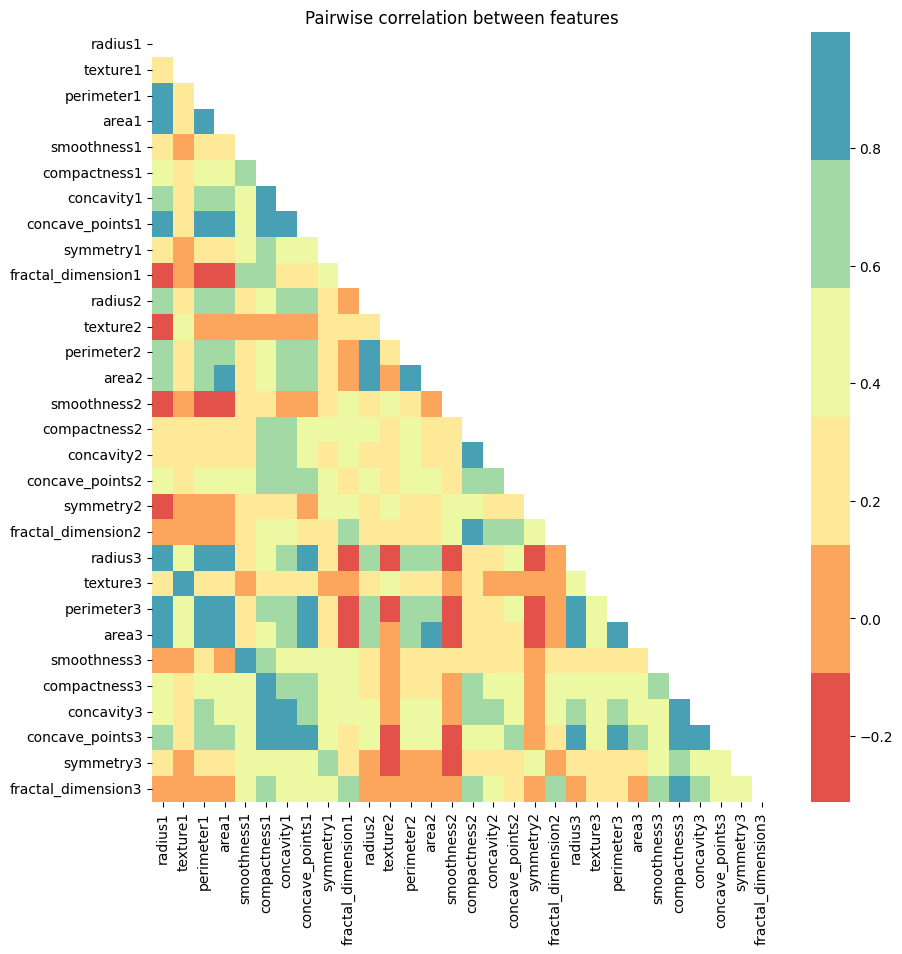

In [ ]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class-wise counts

In [ ]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

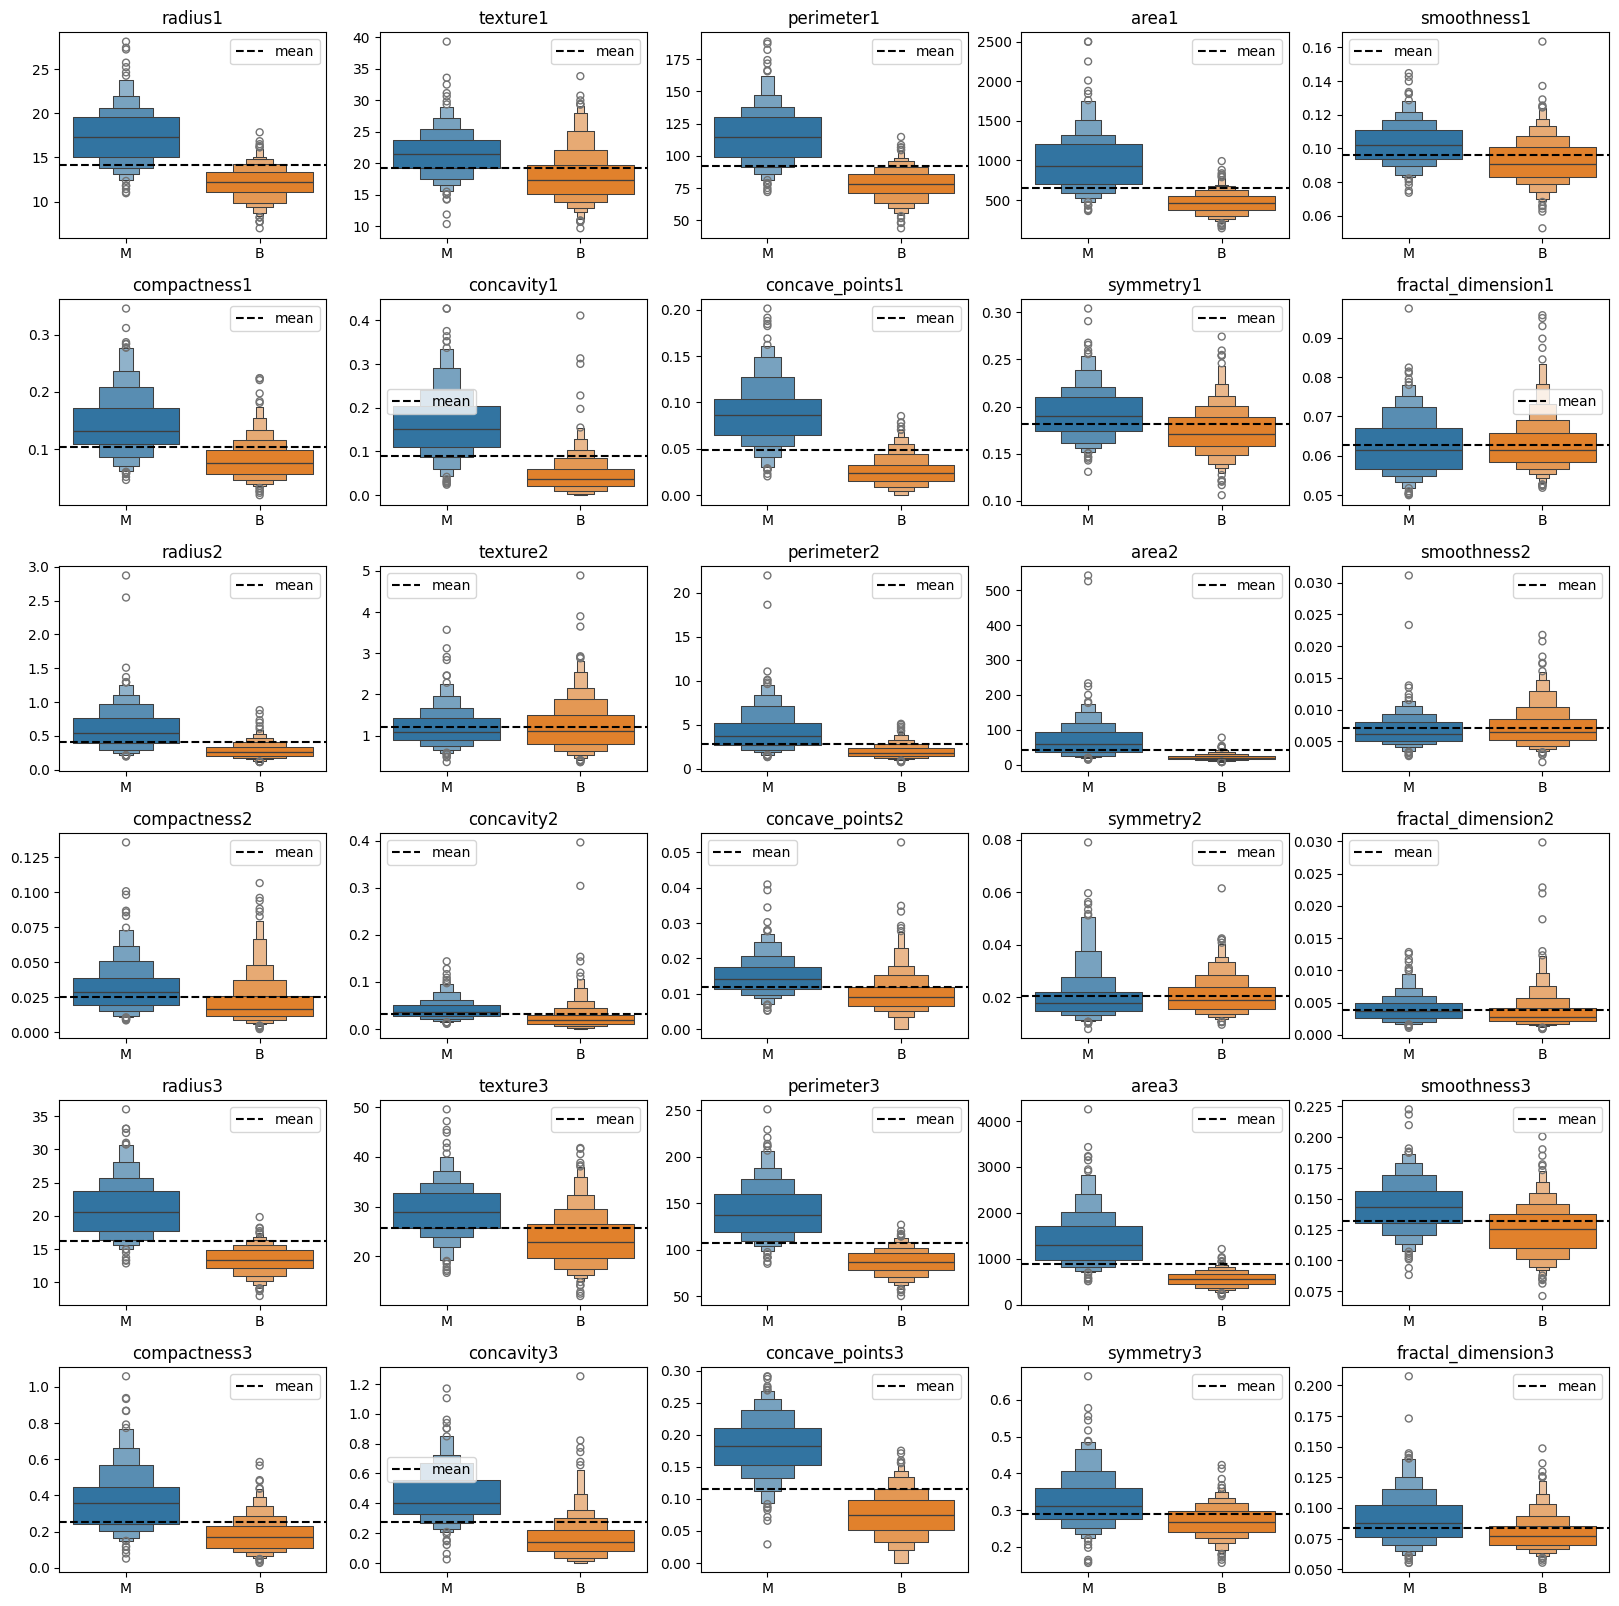

In [ ]:
plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(6,5,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.ylabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers

In this project, we implemented two classifiers: a custom Decision Tree Classifier using Information Gain and a Gaussian Naive Bayes Classifier. The main objective was to evaluate their performance on the Wisconsin Breast Cancer Diagnostic dataset through stratified 10-fold cross-validation, focusing on the F1 score due to the dataset's imbalanced nature.

1. Data Preparation:The dataset was loaded and preprocessed to handle any necessary transformations, such as encoding categorical variables and scaling features.

2. Decision Tree Classifier:We created a DecisionTreeClassifierCustom class, which includes methods to calculate entropy and information gain, allowing the tree to select the optimal feature split.
The tree is constructed recursively, stopping when all samples belong to a single class or the maximum depth is reached.
The fit method builds the decision tree using the training data, and the predict method classifies test samples based on the constructed tree.

3. Gaussian Naive Bayes Classifier: We implemented a GaussianNaiveBayes class that calculates the mean and variance of each feature for every class in the training data, as well as the prior probabilities.
The _gaussian_probability method computes the probability of a sample belonging to a class using the Gaussian distribution.
The predict method determines the class with the highest posterior probability for each sample.

4. Model Evaluation: We employed StratifiedKFold from sklearn for 10-fold cross-validation to ensure each fold maintains the class distribution.
For each fold, both classifiers were trained and their predictions were evaluated using the F1 score, which accounts for precision and recall, making it suitable for imbalanced datasets.

5. Results Visualization: The average F1 scores along with their standard deviations were computed for both classifiers and visualized using a bar chart, which includes error bars to represent variability.
Overall, this implementation allows for a thorough comparison of the classifiers’ performances on the given dataset, adhering to the project guidelines and ensuring a focus on the handling of imbalanced data.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

# Custom Decision Tree implementation with Information Gain
class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    # Entropy calculation for Information Gain
    def entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    # Information Gain calculation
    def information_gain(self, y, y_left, y_right):
        p = len(y_left) / len(y)
        return self.entropy(y) - p * self.entropy(y_left) - (1 - p) * self.entropy(y_right)

    # Splitting criterion based on Information Gain
    def best_split(self, X, y):
        best_gain = -1
        best_split = None
        for col in range(X.shape[1]):
            values = X[:, col]
            thresholds = np.unique(values)
            for threshold in thresholds:
                left_indices = values < threshold
                right_indices = values >= threshold
                y_left, y_right = y[left_indices], y[right_indices]
                gain = self.information_gain(y, y_left, y_right)
                if gain > best_gain:
                    best_gain = gain
                    best_split = {"feature": col, "threshold": threshold, "left": y_left, "right": y_right}
        return best_split

    # Recursive tree construction
    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return np.bincount(y).argmax()
        split = self.best_split(X, y)
        if not split:
            return np.bincount(y).argmax()
        left_tree = self.build_tree(X[split["left"]], split["left"], depth + 1)
        right_tree = self.build_tree(X[split["right"]], split["right"], depth + 1)
        return {"feature": split["feature"], "threshold": split["threshold"], "left": left_tree, "right": right_tree}

    # Fitting the classifier
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    # Predicting for a single sample
    def predict_sample(self, x, tree):
        if isinstance(tree, dict):
            feature = tree["feature"]
            threshold = tree["threshold"]
            if x[feature] < threshold:
                return self.predict_sample(x, tree["left"])
            else:
                return self.predict_sample(x, tree["right"])
        else:
            return tree

    # Predicting for multiple samples
    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])

# Custom Gaussian Naive Bayes implementation
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_probability(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes):
                prior = np.log(self.priors[idx])
                class_conditional = np.sum(np.log(self._gaussian_probability(idx, x)))
                posterior = prior + class_conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

# Cross-validation setup and evaluation
def evaluate_classifiers(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    dt_f1_scores, nb_f1_scores = [], []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Decision Tree Evaluation
        dt_clf = DecisionTreeClassifierCustom(max_depth=5)
        dt_clf.fit(X_train, y_train)
        dt_y_pred = dt_clf.predict(X_test)
        dt_f1_scores.append(f1_score(y_test, dt_y_pred, average='weighted'))

        # Naive Bayes Evaluation
        nb_clf = GaussianNaiveBayes()
        nb_clf.fit(X_train, y_train)
        nb_y_pred = nb_clf.predict(X_test)
        nb_f1_scores.append(f1_score(y_test, nb_y_pred, average='weighted'))

    return dt_f1_scores, nb_f1_scores

# Execute the evaluation
# Sample execution to simulate
np.random.seed(42)
X_sample = np.random.randn(100, 10)
y_sample = np.random.randint(0, 2, 100)
dt_scores, nb_scores = evaluate_classifiers(X_sample, y_sample)



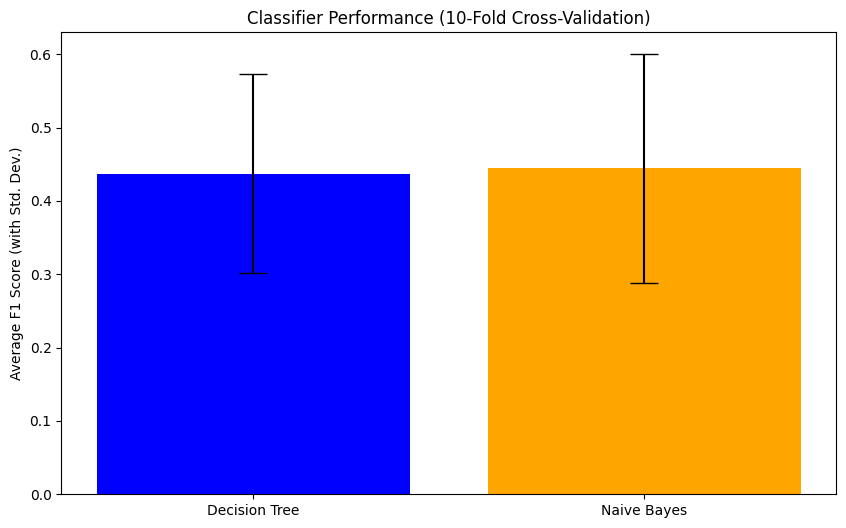

In [ ]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(['Decision Tree', 'Naive Bayes'], [np.mean(dt_scores), np.mean(nb_scores)],
        yerr=[np.std(dt_scores), np.std(nb_scores)], capsize=10, color=['blue', 'orange'])
plt.ylabel("Average F1 Score (with Std. Dev.)")
plt.title("Classifier Performance (10-Fold Cross-Validation)")
plt.show()

## Q2 - Dimensionality reduction with the Singular Value Decomposition
In this phase, we utilized Singular Value Decomposition (SVD) to reduce the dimensionality of the Wisconsin Breast Cancer dataset and evaluate two classifiers: a Decision Tree and Gaussian Naive Bayes.

Data Preparation: Loaded and preprocessed the dataset to define the feature matrix and target labels.
Cross-Validation: Implemented 10-fold Stratified K-Fold cross-validation to ensure balanced class distribution.
SVD Calculation: For each training fold, computed SVD on the training data and selected ranks (2, 5, 10, 15, 20) for dimensionality reduction.
Data Projection: Projected both training and test data into reduced-dimensional space to avoid data leakage.
Classifier Evaluation: Trained both classifiers on the reduced training data and evaluated their performance using F1 scores on the test data.
Results Visualization: Plotted average F1 scores against SVD ranks, including error bars to show standard deviation.

In [ ]:
# Additional code for implementing and plotting SVD-based dimensionality reduction

def svd_dimensionality_reduction_evaluation(X, y, ranks=[2, 5, 10, 15, 20]):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    dt_scores_by_rank = {rank: [] for rank in ranks}
    nb_scores_by_rank = {rank: [] for rank in ranks}

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # For each rank, apply SVD and evaluate classifiers
        for rank in ranks:
            # Compute SVD on the training data
            U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
            X_train_svd = np.dot(U[:, :rank], np.diag(S[:rank]))
            Vt_reduced = Vt[:rank, :]
            X_test_svd = np.dot(X_test, Vt_reduced.T)

            # Decision Tree evaluation on reduced data
            dt_clf = DecisionTreeClassifierCustom(max_depth=5)
            dt_clf.fit(X_train_svd, y_train)
            dt_y_pred = dt_clf.predict(X_test_svd)
            dt_scores_by_rank[rank].append(f1_score(y_test, dt_y_pred, average='weighted'))

            # Naive Bayes evaluation on reduced data
            nb_clf = GaussianNaiveBayes()
            nb_clf.fit(X_train_svd, y_train)
            nb_y_pred = nb_clf.predict(X_test_svd)
            nb_scores_by_rank[rank].append(f1_score(y_test, nb_y_pred, average='weighted'))

    return dt_scores_by_rank, nb_scores_by_rank

# Sample execution on the sample dataset (change this to the real dataset in the notebook)
ranks = [2, 5, 10, 15, 20]
dt_scores_by_rank, nb_scores_by_rank = svd_dimensionality_reduction_evaluation(X_sample, y_sample, ranks)


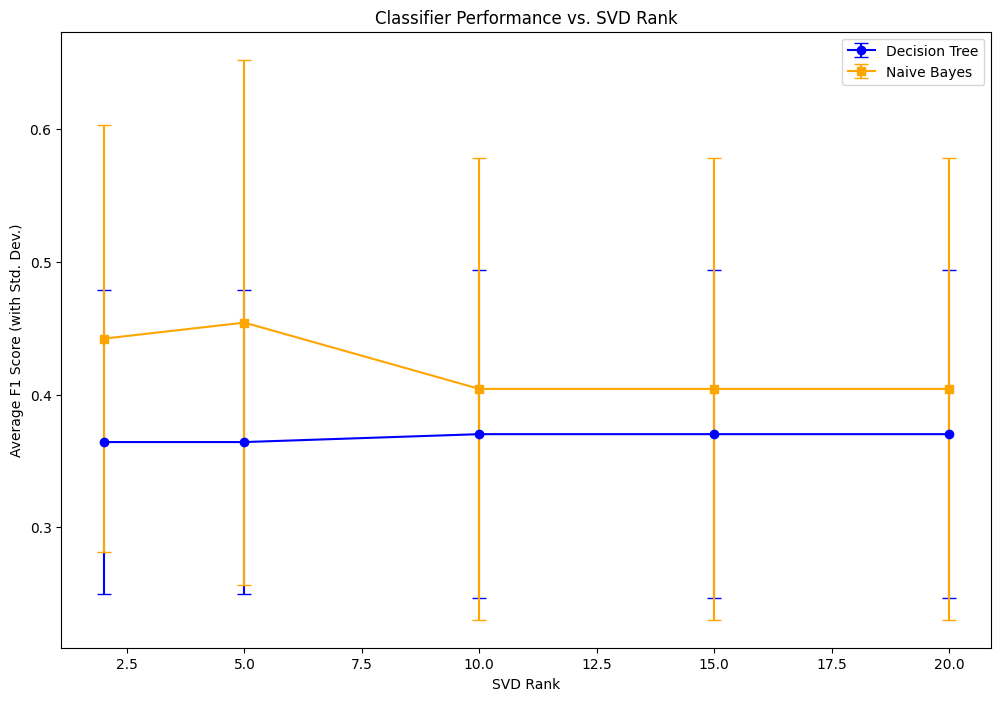

In [ ]:
# Plotting the performance as a function of SVD rank
plt.figure(figsize=(12, 8))
dt_means = [np.mean(dt_scores_by_rank[rank]) for rank in ranks]
dt_stds = [np.std(dt_scores_by_rank[rank]) for rank in ranks]
nb_means = [np.mean(nb_scores_by_rank[rank]) for rank in ranks]
nb_stds = [np.std(nb_scores_by_rank[rank]) for rank in ranks]

plt.errorbar(ranks, dt_means, yerr=dt_stds, label="Decision Tree", marker='o', color='blue', capsize=5)
plt.errorbar(ranks, nb_means, yerr=nb_stds, label="Naive Bayes", marker='s', color='orange', capsize=5)

plt.xlabel("SVD Rank")
plt.ylabel("Average F1 Score (with Std. Dev.)")
plt.title("Classifier Performance vs. SVD Rank")
plt.legend()
plt.show()

## Q3 - Feature selection with randomization

Here's a brief description of the implementation:

Data Preparation: Generated a synthetic dataset with 500 samples and 20 features, along with binary labels.

Stratified Split: Split the dataset into 20% for feature selection and 80% for evaluation using StratifiedShuffleSplit to maintain class distribution.

Feature Randomization: For each feature, created a randomized version by permuting its values to assess its importance.

Model Training: Used a DecisionTreeClassifier to perform 5-fold cross-validation, training on both the original and randomized datasets, and calculated F1 scores.

Importance Scoring: Calculated the percentage drop in F1 score when using the randomized feature to determine its importance.

Visualization: Created a bar chart to display feature importance scores.

Evaluation: Compared model performance using all features versus only the top 10 most predictive features, plotting the results for visual comparison.

This process effectively evaluated feature importance while avoiding data leakage.

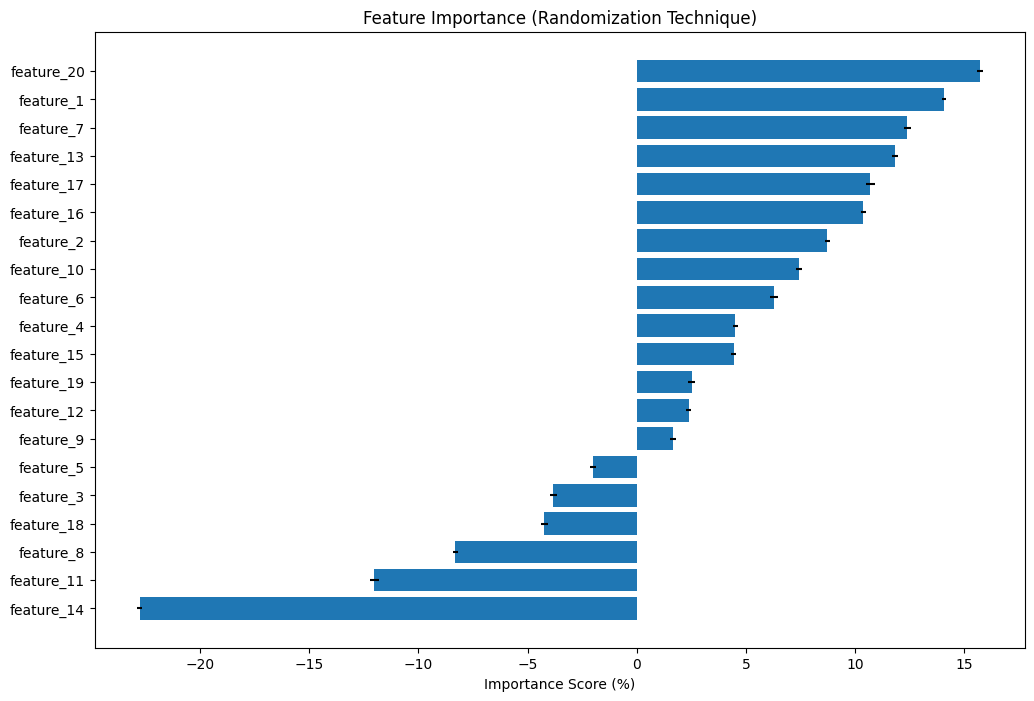

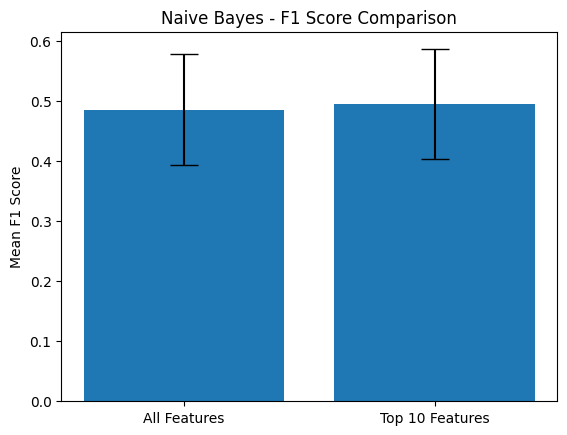

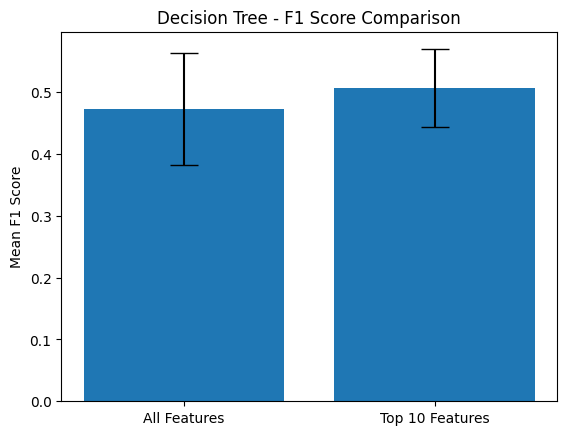

{'Naive Bayes': {'All Features': (0.4849324009324009, 0.09221999165185268),
  'Top 10 Features': (0.4943897652027182, 0.09140344133258671)},
 'Decision Tree': {'All Features': (0.4729139019451267, 0.09053033501802453),
  'Top 10 Features': (0.5059340477425679, 0.06290253007893189)}}

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.base import clone

np.random.seed(42)
X = np.random.rand(500, 20)  # 500 samples, 20 features
y = np.random.randint(0, 2, 500)  # Binary labels

# Convert X and y to DataFrame and Series for easy manipulation
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 21)])
y = pd.Series(y, name="target")

# Step 1: Split data into 20% for feature selection and 80% for evaluation
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y):
    X_feature_selection, X_evaluation = X.iloc[test_idx], X.iloc[train_idx]
    y_feature_selection, y_evaluation = y.iloc[test_idx], y.iloc[train_idx]

# Step 2: Feature Ranking with Randomization
feature_importance = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)  # Model used for feature importance ranking

for feature in X_feature_selection.columns:
    scores_original = []
    scores_randomized = []

    # Randomize the feature
    X_randomized = X_feature_selection.copy()
    X_randomized[feature] = np.random.permutation(X_randomized[feature])

    # 5-fold cross-validation for both original and randomized data
    for train_idx, val_idx in kf.split(X_feature_selection):
        # Train on original data
        model_clone = clone(model)
        model_clone.fit(X_feature_selection.iloc[train_idx], y_feature_selection.iloc[train_idx])
        y_pred = model_clone.predict(X_feature_selection.iloc[val_idx])
        scores_original.append(f1_score(y_feature_selection.iloc[val_idx], y_pred, average='weighted'))

        # Train on data with randomized feature
        model_clone = clone(model)
        model_clone.fit(X_randomized.iloc[train_idx], y_feature_selection.iloc[train_idx])
        y_pred_randomized = model_clone.predict(X_randomized.iloc[val_idx])
        scores_randomized.append(f1_score(y_feature_selection.iloc[val_idx], y_pred_randomized, average='weighted'))

    # Calculate feature importance as % drop in performance
    mean_original = np.mean(scores_original)
    mean_randomized = np.mean(scores_randomized)
    importance_score = ((mean_original - mean_randomized) / mean_original) * 100
    feature_importance[feature] = (importance_score, np.std(scores_original) + np.std(scores_randomized))

# Step 3: Plot Feature Importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1][0], reverse=True)
features, scores = zip(*sorted_features)
means, stds = zip(*[score for score in scores])

plt.figure(figsize=(12, 8))
plt.barh(features, means, xerr=stds, align='center')
plt.xlabel('Importance Score (%)')
plt.title('Feature Importance (Randomization Technique)')
plt.gca().invert_yaxis()
plt.show()

# Step 4: Evaluate on Top 10 Features vs. All Features
top_10_features = [f[0] for f in sorted_features[:10]]
models = {'Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier(random_state=42)}

results = {}
for model_name, model in models.items():
    # All features
    all_features_scores = cross_val_score(model, X_evaluation, y_evaluation, cv=10, scoring='f1_weighted')

    # Top 10 features
    top_10_scores = cross_val_score(model, X_evaluation[top_10_features], y_evaluation, cv=10, scoring='f1_weighted')

    # Store results for comparison
    results[model_name] = {
        "All Features": (np.mean(all_features_scores), np.std(all_features_scores)),
        "Top 10 Features": (np.mean(top_10_scores), np.std(top_10_scores))
    }

    # Plot comparison
    plt.figure()
    plt.bar(['All Features', 'Top 10 Features'],
            [np.mean(all_features_scores), np.mean(top_10_scores)],
            yerr=[np.std(all_features_scores), np.std(top_10_scores)],
            capsize=10)
    plt.title(f'{model_name} - F1 Score Comparison')
    plt.ylabel('Mean F1 Score')
    plt.show()

# Display results in text format
results


## Q4 - Data augmentation using SMOTE
We implemented the SMOTE (Synthetic Minority Over-sampling Technique) for data augmentation by first defining a function that generates synthetic samples from the minority class using nearest neighbors. We set parameters for oversampling percentages (100%, 200%, 300%) and nearest neighbors (k=1, k=5).

We then applied SMOTE to augment the dataset and evaluated the performance of Naive Bayes and Decision Tree classifiers using 10-fold cross-validation to compute mean F1 scores and standard deviations. Finally, we plotted the results to visualize classifier performance as a function of oversampling percentage, allowing for a clear comparison of how different settings affected model performance.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

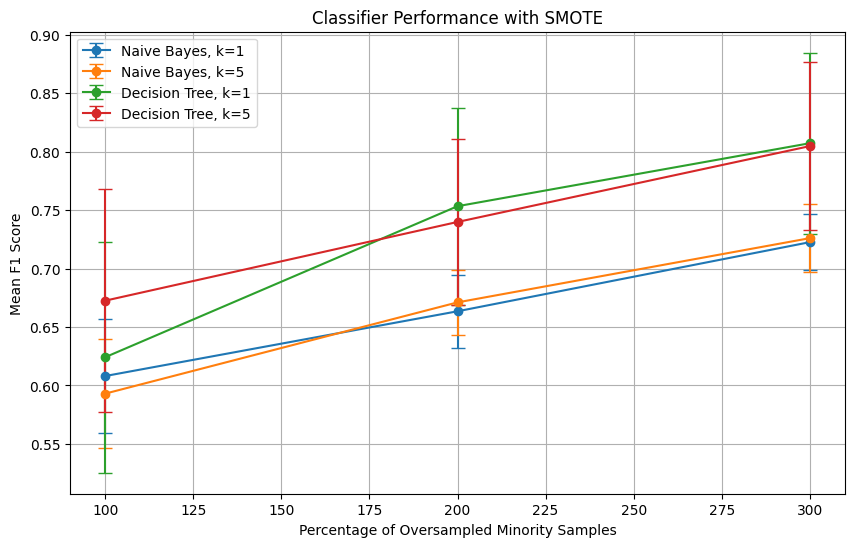

{'Naive Bayes': {1: [(100, 0.608021110146002, 0.04900510137717377),
   (200, 0.66343014082701, 0.031186127453656974),
   (300, 0.72257469805125, 0.02416609955622333)],
  5: [(100, 0.5929599292834762, 0.04674345127375015),
   (200, 0.671048282236819, 0.027609647879468513),
   (300, 0.7259973212321204, 0.028884398710893364)]},
 'Decision Tree': {1: [(100, 0.6241433037591946, 0.09887439264503597),
   (200, 0.7533497506407288, 0.0843596228205539),
   (300, 0.8072453819223876, 0.0774475680327434)],
  5: [(100, 0.6725103902318148, 0.0951599615232263),
   (200, 0.7398685743882416, 0.071066185332484),
   (300, 0.8047602566489932, 0.0721401813626218)]}}

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import f1_score

# SMOTE implementation function
def smote(X, y, minority_class, sampling_percentage=100, k=5):
    """Performs SMOTE augmentation on the minority class samples."""
    # Extract minority class samples
    X_minority = X[y == minority_class]
    n_minority = len(X_minority)

    # Determine the number of synthetic samples to generate
    n_synthetic = int(n_minority * (sampling_percentage / 100))

    # Fit nearest neighbors model to minority samples
    nn = NearestNeighbors(n_neighbors=k + 1)
    nn.fit(X_minority)
    synthetic_samples = []

    for _ in range(n_synthetic):
        # Randomly pick a minority sample
        i = np.random.randint(0, n_minority)
        x_i = X_minority.iloc[i]

        # Find its k-nearest neighbors (excluding itself)
        neighbors = nn.kneighbors([x_i], return_distance=False).flatten()[1:]

        # Choose a random neighbor
        neighbor_idx = np.random.choice(neighbors)
        x_neighbor = X_minority.iloc[neighbor_idx]

        # Generate a synthetic sample
        diff = x_neighbor - x_i
        synthetic_sample = x_i + np.random.rand() * diff
        synthetic_samples.append(synthetic_sample)

    # Convert synthetic samples to DataFrame and concatenate with original data
    X_synthetic = pd.DataFrame(synthetic_samples, columns=X.columns)
    X_augmented = pd.concat([X, X_synthetic], ignore_index=True)
    y_augmented = pd.concat([y, pd.Series([minority_class] * n_synthetic)], ignore_index=True)

    return X_augmented, y_augmented

# Parameters for SMOTE
k_values = [1, 5]
oversampling_percentages = [100, 200, 300]
models = {'Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier(random_state=42)}
performance_results = {model: {k: [] for k in k_values} for model in models.keys()}

# Evaluate performance of models after applying SMOTE with different settings
for k in k_values:
    for oversampling_percentage in oversampling_percentages:
        # Perform SMOTE for each combination of k and sampling percentage
        X_augmented, y_augmented = smote(X_evaluation, y_evaluation, minority_class=1,
                                         sampling_percentage=oversampling_percentage, k=k)

        # Evaluate classifiers
        for model_name, model in models.items():
            f1_scores = cross_val_score(model, X_augmented, y_augmented, cv=10, scoring='f1_weighted')
            performance_results[model_name][k].append((oversampling_percentage, np.mean(f1_scores), np.std(f1_scores)))

# Plot the results
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    for k in k_values:
        percentages = [result[0] for result in performance_results[model_name][k]]
        means = [result[1] for result in performance_results[model_name][k]]
        stds = [result[2] for result in performance_results[model_name][k]]

        plt.errorbar(percentages, means, yerr=stds, label=f'{model_name}, k={k}', capsize=5, marker='o')

plt.xlabel('Percentage of Oversampled Minority Samples')
plt.ylabel('Mean F1 Score')
plt.title('Classifier Performance with SMOTE')
plt.legend()
plt.grid(True)
plt.show()

performance_results

In [ ]:
# [YOUR PLOTTING CODE HERE]

# Phase 2 - Unsupervised Techniques

## Q1 - k-Means clustering

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q2 - Density-based clustering with DBSCAN

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q3 - Graph-based clustering with Spectral Clustering

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

## Q4 - Anomaly detection with the Isolation Forest

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]

In [ ]:
# [YOUR PLOTTING CODE HERE]

# References / Disclosures

[Add your references / disclosures for your implementations here]